## Linear Regression Project

Linear regression is a popular regression learning algorithm that learns 
a model which is a linear combination of features of the input example.

About the DATA:

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [5]:
#Data import command, raw data can be found in project folder

customers = pd.read_csv('Ecommerce Customers')

In [6]:
#Checking the head of the data

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
#   describe() The describe() method is used for calculating some 
#   statistical data like percentile, mean and std of the numerical values 
#   of the Series or DataFrame. It analyzes both numeric and object series and 
#   also the DataFrame column sets of mixed data types.


customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#    The info() function is used to print a concise summary of a DataFrame. 
#    This method prints information about a DataFrame including the index dtype and 
#    column dtypes, non-null values and memory usage

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<Figure size 720x720 with 0 Axes>

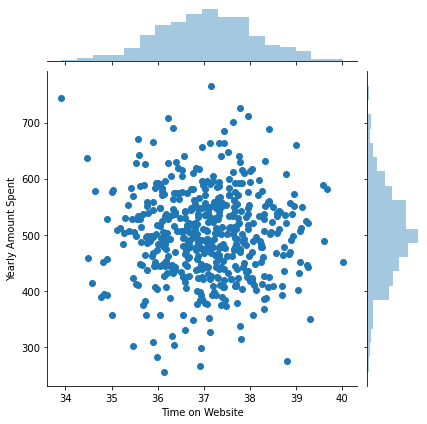

In [10]:
#   Seaborn's jointplot displays a relationship between 2 variables (bivariate) 
#   as well as 1D profiles (univariate) in the margins. 
#   This plot is a convenience class that wraps JointGrid.


plt.figure(figsize = (10, 10)) # Make the figure larger
sns.jointplot('Time on Website', 'Yearly Amount Spent', data = customers, kind='scatter'  )

<Figure size 720x504 with 0 Axes>

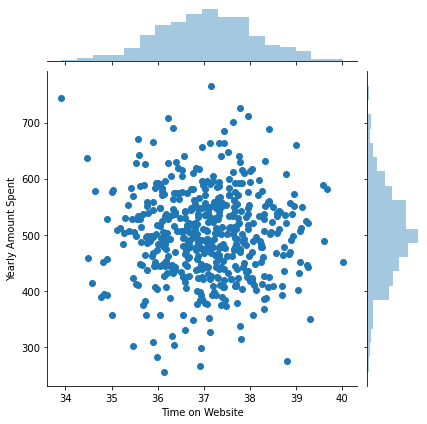

In [11]:

plt.figure(figsize = (10, 7))   # Make the figure larger
sns.jointplot('Time on Website', 'Yearly Amount Spent', data = customers, kind='scatter'  )

<Figure size 720x504 with 0 Axes>

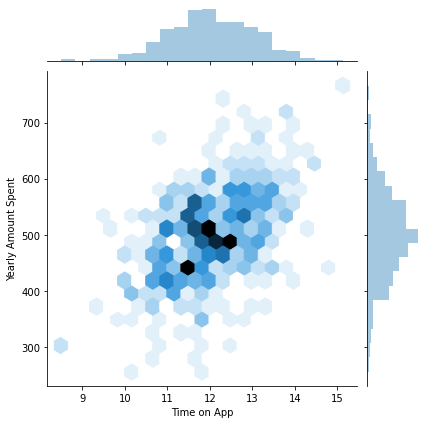

In [20]:

plt.figure(figsize = (10, 7)) # Make the figure larger
sns.jointplot('Time on App', 'Yearly Amount Spent', data = customers, kind='hex')

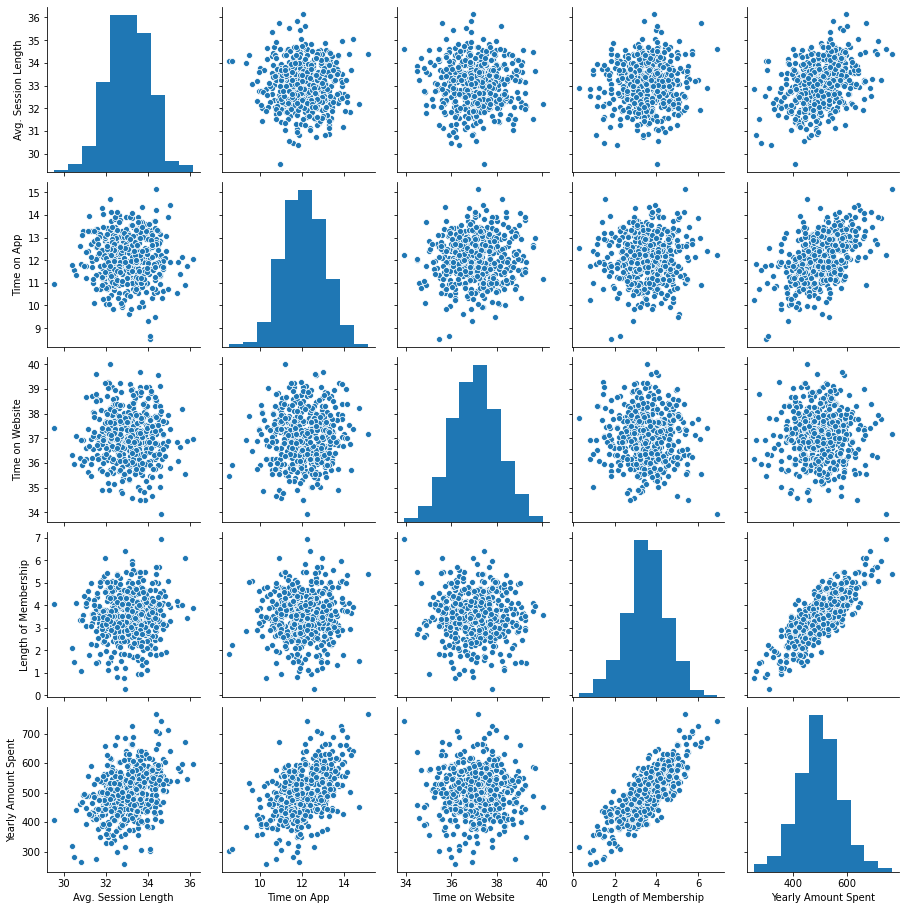

In [12]:
#    A pairplot plot a pairwise relationships in a dataset. The 
#    pairplot function creates a grid of Axes such that each variable in 
#    data will by shared in the y-axis across a single row 
#    and in the x-axis across a single column.

sns.pairplot(customers)

<Figure size 720x576 with 0 Axes>

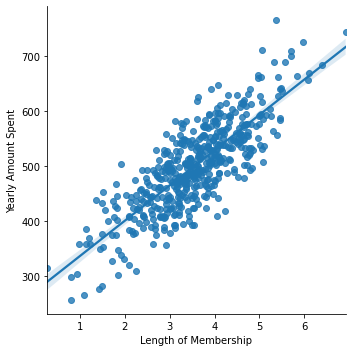

In [13]:
#     seaborn lmplot. The lineplot (lmplot) is one of the most basic plots. 
#     It shows a line on a 2 dimensional plane. ... Seaborn by default includes all 
#     kinds of data sets, which we use to plot the data.


plt.figure(figsize = (10, 8)) # Make the figure larger
#plt.scatter('Length of Membership', 'Yearly Amount Spent', data = df)
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data=customers)

In [14]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
#     X corresponds to your float feature matrix of shape (n_samples, n_features) 
#     (aka. the design matrix of your training set)

#     y is the float target vector of shape (n_samples,) (the label vector). 
#     In your case, label 0 could correspond to a spam example, and 1 to a ham one


X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

y = customers["Yearly Amount Spent"]

In [15]:
#        train_test_split. Quick utility that wraps input validation and 
#        next(ShuffleSplit(). split(X, y)) and application to input data into a 
#        single call for splitting (and optionally subsampling) data in a oneliner. 
#        Allowed inputs are lists, numpy arrays, 
#       scipy-sparse matrices or pandas dataframes.

from sklearn.model_selection import train_test_split

In [26]:
#       The test set is a subset of the data set that you use 
#       to test your model after the model has gone through initial 
#       vetting by the validation set. x_test is the test data set. y_test 
#       is the set of labels to all the data in x_test .

#       test_size — This parameter decides the size of the data that has to be split 
#       as the test dataset. This is given as a fraction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
#        The most frequently used in practice open-source machine learning
#        library is scikit-learn. 

#        linear_model . LinearRegression fits a linear model with 
#        coefficients w = (w1, …, wp) to minimize the residual sum of 
#        squares between the observed targets in the dataset, 
#        and the targets predicted by the linear approximation

from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
#      coef_ gives you an array of weights estimated by linear regression. 
#      It is of shape (n_targets, n_features). ... In your case weights has 
#      huge values, make sure you normalize your features and use regularization 
#      for your model.

lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [31]:
#    predict() : given a trained model, predict the label of a new set of data. 
#    This method accepts one argument, the new data X_new (e.g. model. predict(X_new) ),
#    and returns the learned label for each object in the array.

predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

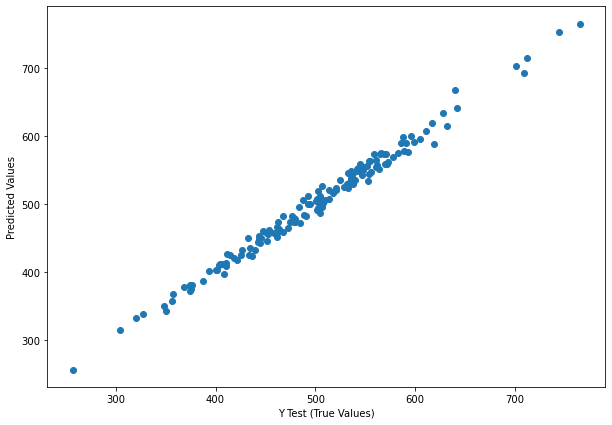

In [32]:


plt.figure(figsize = (10, 7))   # Make the figure larger
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [33]:
#     The sklearn. metrics module implements several loss, score, and utility 
#     functions to measure classification performance. Some metrics might require 
#     probability estimates of the positive class, confidence values, or binary 
#     decisions values

from sklearn import metrics

In [34]:
#     metrics . mean_absolute_error. If multioutput is 'raw_values', 
#     then mean absolute error is returned for each output separately

print('MAE', metrics.mean_absolute_error(y_test, predictions))

#     The RMSE is just the square root of whatever it returns.

print('MSE', metrics.mean_squared_error(y_test, predictions))

print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.228148653430853
MSE 79.81305165097487
RMSE 8.933815066978656


In [35]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

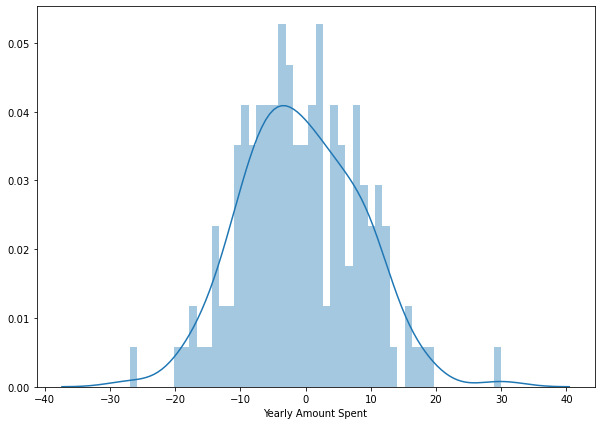

In [36]:


plt.figure(figsize = (10, 7)) # Make the figure larger
sns.distplot((y_test - predictions), bins=50)

In [37]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns= ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
